# <center>EPIB 613 INTRODUCTION TO STATISTICAL SOFTWARE</center>

<center> McGill EBOH </center>

<center> Fall 2020 </center>

<center> Yi Lian </center>

# Lecture 4
1. Subset data
2. Merge data

## 4.1 Subset data
#### Common tasks
- Select/delete columns
- Select/delete rows with or without conditions
- Select columns and rows with or without conditions

<b style="color:red;">How many of you tried the exercise in the last lecture?</b>

#### Using
- $ and [ , ]
- subset( )
- <tt>dplyr</tt> package and the entire <tt>tidyverse</tt>

##### Pick your favorite - one is enough.

In [1]:
########## Lecture 4 ##########
df <- read.csv("https://raw.githubusercontent.com/ly129/EPIB613_2020/master/scores.csv")
df <- df[1:5, ]
df

X,students,course,scores,curve,pass
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>
1,Lucy,epib607,80,88.0,TRUE
2,John,epib607,99,108.9,TRUE
3,Mark,epib607,55,60.5,FALSE
4,Candy,epib607,70,77.0,TRUE
5,Chris,epib607,84,92.4,TRUE


### 4.1.1 $ and [ , ]

In [2]:
names(df)

[1] "X"        "students" "course"   "scores"   "curve"    "pass"

In [3]:
# Recall the indexing system in R
df$students   # Select one variable

[1] Lucy  John  Mark  Candy Chris
Levels: Candy Chris John Lucy Mark

In [4]:
# Delete one variable
df$X <- NULL
df

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88.0,TRUE
John,epib607,99,108.9,TRUE
Mark,epib607,55,60.5,FALSE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE


In [5]:
df[, 2, drop = F]

course
<fct>
epib607
epib607
epib607
epib607
epib607


In [6]:
df[ , "scores"]

[1] 80 99 55 70 84

In [7]:
str(df[ , "scores"])   # 1D vector

 int [1:5] 80 99 55 70 84


In [8]:
df[ , "scores", drop = FALSE]
str(df[ , "scores", drop = FALSE])   # 4 x 1 data frame

scores
<int>
80
99
55
70
84


'data.frame':	5 obs. of  1 variable:
 $ scores: int  80 99 55 70 84


In [9]:
df[1, ]
str(df[1, ])   # 1 x 4 data frame
# Can we drop a dimension here? Why?

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88,TRUE


'data.frame':	1 obs. of  5 variables:
 $ students: Factor w/ 5 levels "Candy","Chris",..: 4
 $ course  : Factor w/ 2 levels "epib607","epib613": 1
 $ scores  : int 80
 $ curve   : num 88
 $ pass    : logi TRUE


In [10]:
df[1, , drop = TRUE]

$students
[1] Lucy
Levels: Candy Chris John Lucy Mark

$course
[1] epib607
Levels: epib607 epib613

$scores
[1] 80

$curve
[1] 88

$pass
[1] TRUE

In [11]:
# Delete variable "names" + reorder columns
df[ , c("students", "pass", "scores")]

students,pass,scores
<fct>,<lgl>,<int>
Lucy,TRUE,80
John,TRUE,99
Mark,FALSE,55
Candy,TRUE,70
Chris,TRUE,84


In [12]:
# Select rows that passed
df$pass == T
df[df$pass == TRUE, ]

[1]  TRUE  TRUE FALSE  TRUE  TRUE

,students,course,scores,curve,pass
,<fct>,<fct>,<int>,<dbl>,<lgl>
1,Lucy,epib607,80,88.0,TRUE
2,John,epib607,99,108.9,TRUE
4,Candy,epib607,70,77.0,TRUE
5,Chris,epib607,84,92.4,TRUE


In [13]:
df[df$students == "Lucy", ]

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88,TRUE


In [14]:
# Delete variable
df[ , -c(1, 2)]   # Delete the 1st and 2nd

scores,curve,pass
<int>,<dbl>,<lgl>
80,88.0,TRUE
99,108.9,TRUE
55,60.5,FALSE
70,77.0,TRUE
84,92.4,TRUE


In [15]:
# I believe that this used to work, but not anymore.
# df[ , -c("names", "score")]

# Now
drop <- c("students", "curve")
df[ , !names(df) %in% drop]

course,scores,pass
<fct>,<int>,<lgl>
epib607,80,TRUE
epib607,99,TRUE
epib607,55,FALSE
epib607,70,TRUE
epib607,84,TRUE


In [16]:
df

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88.0,TRUE
John,epib607,99,108.9,TRUE
Mark,epib607,55,60.5,FALSE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE


In [17]:
names(df)
!names(df) %in% drop

[1] "students" "course"   "scores"   "curve"    "pass"

[1] FALSE  TRUE  TRUE FALSE  TRUE

In [18]:
select = c("course", "scores", "pass")
df[ , names(df) %in% select]

course,scores,pass
<fct>,<int>,<lgl>
epib607,80,TRUE
epib607,99,TRUE
epib607,55,FALSE
epib607,70,TRUE
epib607,84,TRUE


In [19]:
# How does this work?
1 %in% c(1, 3, 5)
"b" %in% c("a", "c", "e")
1:10 %in% c(1, 3, 5)

[1] TRUE

[1] FALSE

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE

##### a %in% b checks whether $a\in b$ for every single entry in a.

##### Exercise: show the name and score of those who passed except Lucy.

In [20]:
# df[row.cond, col.cond]
df[df$students != "Lucy" & df$pass == TRUE, c("students", "scores")]

,students,scores
,<fct>,<int>
2,John,99
4,Candy,70
5,Chris,84


### 4.1.2 subset( )
    subset(x, subset, select, drop = FALSE, ...)

In [21]:
df

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88.0,TRUE
John,epib607,99,108.9,TRUE
Mark,epib607,55,60.5,FALSE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE


In [22]:
# "select" argument selects columns
subset(df, select = c(students, pass))

students,pass
<fct>,<lgl>
Lucy,TRUE
John,TRUE
Mark,FALSE
Candy,TRUE
Chris,TRUE


In [23]:
# Can also delete unwanted columns
subset(df, select = -c(curve, pass))

students,course,scores
<fct>,<fct>,<int>
Lucy,epib607,80
John,epib607,99
Mark,epib607,55
Candy,epib607,70
Chris,epib607,84


In [24]:
# "subset" argument selects rows
# Can apply conditions
subset(df, subset = (scores > 80))

,students,course,scores,curve,pass
,<fct>,<fct>,<int>,<dbl>,<lgl>
2,John,epib607,99,108.9,TRUE
5,Chris,epib607,84,92.4,TRUE


In [25]:
# Now use both select and subset arguments to apply conditions
# Select the names of those who passed
subset(df, select = students, subset = (pass == TRUE))

,students
,<fct>
1,Lucy
2,John
4,Candy
5,Chris


##### Note that all subsets are still data frames.
##### Exercise: show the name and score of those who passed except Lucy.

In [26]:
# Show the name and score of those who passed except Lucy.
# Recall logical operators &, | and !
subset(df, select=c(students, scores), subset= pass & students!="Lucy" )

,students,scores
,<fct>,<int>
2,John,99
4,Candy,70
5,Chris,84


In [27]:
# use of ()
x <- 1

In [28]:
(x <- 1)

[1] 1

In [29]:
df$pass & df$students!="Lucy"

[1] FALSE  TRUE FALSE  TRUE  TRUE

In [30]:
(df$pass & df$students!="Lucy")

[1] FALSE  TRUE FALSE  TRUE  TRUE

In [31]:
df$pass

[1]  TRUE  TRUE FALSE  TRUE  TRUE

In [32]:
df$pass == TRUE

[1]  TRUE  TRUE FALSE  TRUE  TRUE

### 4.1.3 dplyr package

    'dplyr is a grammar of data manipulation'
https://dplyr.tidyverse.org

I do not use this package, or any other packages within the whole <tt>tidyverse</tt>. https://www.tidyverse.org

In [33]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#### The messages
- The 'stats' package and the 'base' package are installed when you install R and are loaded when you open R
- They have some functions called filter( ), lag( ), intersect( ), etc
- The 'dplyr' package has functions of the same name
- After you load 'dplyr', when you call these functions, you will use the ones in 'dplyr' instead of the ones in 'stats' and 'base'.

##### Exercise: Show the name and score of those who passed except Lucy.

In [34]:
df.step1 <- filter(df, pass & students != "Lucy"); df.step1

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
John,epib607,99,108.9,TRUE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE


In [35]:
df.step2 <- select(df.step1, students, scores); df.step2

students,scores
<fct>,<int>
John,99
Candy,70
Chris,84


In [36]:
df %>% 
  filter(pass == T & students != "Lucy") %>%
  select(students, scores)

students,scores
<fct>,<int>
John,99
Candy,70
Chris,84


#### dplyr cheetsheet
https://github.com/rstudio/cheatsheets/blob/master/data-transformation.pdf

##### Survey: [,] or subset( ), dplyr
- [,] and $: 4
- subset(): 1
- dplyr: 22 - 5

## 4.2 Merge data
### 4.2.1 Add cases/observations to a data frame
This is basically adding rows.

In [37]:
df

students,course,scores,curve,pass
<fct>,<fct>,<int>,<dbl>,<lgl>
Lucy,epib607,80,88.0,TRUE
John,epib607,99,108.9,TRUE
Mark,epib607,55,60.5,FALSE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE


In [38]:
# The column names must match exactly
new.students <- data.frame(students = c("Name", "Nom"),
                           course = 'epib607',
                           scores = c(79, 48),
                           curve = c(79, 48) * 1.1,
                           pass = c(TRUE, FALSE))
new.students

students,course,scores,curve,pass
<fct>,<fct>,<dbl>,<dbl>,<lgl>
Name,epib607,79,86.9,TRUE
Nom,epib607,48,52.8,FALSE


In [39]:
df.new <- rbind(df, new.students); df.new

students,course,scores,curve,pass
<fct>,<fct>,<dbl>,<dbl>,<lgl>
Lucy,epib607,80,88.0,TRUE
John,epib607,99,108.9,TRUE
Mark,epib607,55,60.5,FALSE
Candy,epib607,70,77.0,TRUE
Chris,epib607,84,92.4,TRUE
Name,epib607,79,86.9,TRUE
Nom,epib607,48,52.8,FALSE


##### Exercise: Replicate with dplyr

### 4.2.2 Add variables to a dataset
This is adding columns.

In [40]:
# Option 1
df.copy <- df
df.copy$id1 <- 1:5
df.copy

students,course,scores,curve,pass,id1
<fct>,<fct>,<int>,<dbl>,<lgl>,<int>
Lucy,epib607,80,88.0,TRUE,1
John,epib607,99,108.9,TRUE,2
Mark,epib607,55,60.5,FALSE,3
Candy,epib607,70,77.0,TRUE,4
Chris,epib607,84,92.4,TRUE,5


In [41]:
# Option 2
df.copy <- data.frame(df, id2 = 1:5)
df.copy

students,course,scores,curve,pass,id2
<fct>,<fct>,<int>,<dbl>,<lgl>,<int>
Lucy,epib607,80,88.0,TRUE,1
John,epib607,99,108.9,TRUE,2
Mark,epib607,55,60.5,FALSE,3
Candy,epib607,70,77.0,TRUE,4
Chris,epib607,84,92.4,TRUE,5


In [42]:
# Option 3
id3 <- 1:5
df <- cbind(id3, df)
df

id3,students,course,scores,curve,pass
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>
1,Lucy,epib607,80,88.0,TRUE
2,John,epib607,99,108.9,TRUE
3,Mark,epib607,55,60.5,FALSE
4,Candy,epib607,70,77.0,TRUE
5,Chris,epib607,84,92.4,TRUE


##### Easily extend to adding multiple columns.

##### Exercise: Replicate with dplyr

### 4.2.3 Merge data frames
Can be very useful when we link databases. For example,
1. Database 1 is the electronic health record.
2. Database 2 is the claims data for prescription drugs.

We can merge two databases using the unique patient ID.

In [43]:
# df stores EPIB 607 scores
names(df)[1] <- "id"
df

id,students,course,scores,curve,pass
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>
1,Lucy,epib607,80,88.0,TRUE
2,John,epib607,99,108.9,TRUE
3,Mark,epib607,55,60.5,FALSE
4,Candy,epib607,70,77.0,TRUE
5,Chris,epib607,84,92.4,TRUE


In [44]:
# df.major stores student's ID and program of study of the entire department
df.major <- data.frame(id = 1:7,
                       major = c("MSc PH", "PhD Epi", "MSc Epi",
                                 "MSc PH", "MSc ExMed",
                                 "PhD Biostat", "MSc Biostat"))
df.major

id,major
<int>,<fct>
1,MSc PH
2,PhD Epi
3,MSc Epi
4,MSc PH
5,MSc ExMed
6,PhD Biostat
7,MSc Biostat


In [45]:
merge(df, df.major, by = "id", all = TRUE)

id,students,course,scores,curve,pass,major
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>,<fct>
1,Lucy,epib607,80,88.0,TRUE,MSc PH
2,John,epib607,99,108.9,TRUE,PhD Epi
3,Mark,epib607,55,60.5,FALSE,MSc Epi
4,Candy,epib607,70,77.0,TRUE,MSc PH
5,Chris,epib607,84,92.4,TRUE,MSc ExMed
6,NA,NA,NA,NA,NA,PhD Biostat
7,NA,NA,NA,NA,NA,MSc Biostat


In [46]:
merge(df, df.major, by = "id", all = F)

id,students,course,scores,curve,pass,major
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>,<fct>
1,Lucy,epib607,80,88.0,TRUE,MSc PH
2,John,epib607,99,108.9,TRUE,PhD Epi
3,Mark,epib607,55,60.5,FALSE,MSc Epi
4,Candy,epib607,70,77.0,TRUE,MSc PH
5,Chris,epib607,84,92.4,TRUE,MSc ExMed


In [47]:
# Question from class:
# In case of duplicated variable names from both data frames that are not used for merging,
# keep only one of them.

# The merge() function does not seem to support it.
    # Maybe delete the unwanted one from one of the data frames before merging is easier.
# We can still do something on our own.

df.major$scores <- round(runif(7, 50, 100)); df.major

id,major,scores
<int>,<fct>,<dbl>
1,MSc PH,81
2,PhD Epi,53
3,MSc Epi,56
4,MSc PH,87
5,MSc ExMed,88
6,PhD Biostat,77
7,MSc Biostat,82


In [48]:
# Note how merge() treats duplicated variables (scores.x and scores.y)
merge(x = df, y = df.major, by = "id")

id,students,course,scores.x,curve,pass,major,scores.y
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>,<fct>,<dbl>
1,Lucy,epib607,80,88.0,TRUE,MSc PH,81
2,John,epib607,99,108.9,TRUE,PhD Epi,53
3,Mark,epib607,55,60.5,FALSE,MSc Epi,56
4,Candy,epib607,70,77.0,TRUE,MSc PH,87
5,Chris,epib607,84,92.4,TRUE,MSc ExMed,88


In [49]:
# We can change the suffixes
merge(df, df.major, by = "id", suffixes = c(".keep", ".discard"))

id,students,course,scores.keep,curve,pass,major,scores.discard
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>,<fct>,<dbl>
1,Lucy,epib607,80,88.0,TRUE,MSc PH,81
2,John,epib607,99,108.9,TRUE,PhD Epi,53
3,Mark,epib607,55,60.5,FALSE,MSc Epi,56
4,Candy,epib607,70,77.0,TRUE,MSc PH,87
5,Chris,epib607,84,92.4,TRUE,MSc ExMed,88


In [50]:
# Use functions that deal with character string in R
# ?grepl
grepl("a", c("abc", "bbc", "cbc"))

[1]  TRUE FALSE FALSE

In [51]:
df.dup <- merge(df, df.major, by = "id", suffixes = c(".keep", ".discard"))
discard.flag <- grepl(".discard", names(df.dup))
df.dup[, !discard.flag]

id,students,course,scores.keep,curve,pass,major
<int>,<fct>,<fct>,<int>,<dbl>,<lgl>,<fct>
1,Lucy,epib607,80,88.0,TRUE,MSc PH
2,John,epib607,99,108.9,TRUE,PhD Epi
3,Mark,epib607,55,60.5,FALSE,MSc Epi
4,Candy,epib607,70,77.0,TRUE,MSc PH
5,Chris,epib607,84,92.4,TRUE,MSc ExMed


##### Exercise: Replicate with dplyr

In [52]:
# Replicate merging with dplyr

In [53]:
# Question from class: make a histogram from a frequency table
# <==> Switch a summary count data into raw data

ddd <- data.frame(Age = c(0,1,2,3), Freqency = c(4, 2, 1, 3))
ddd

Age,Freqency
<dbl>,<dbl>
0,4
1,2
2,1
3,3


In [54]:
# The apply family of functions will come later in the course
mapply(rep, ddd$Age, ddd$Freqency)

[[1]]
[1] 0 0 0 0

[[2]]
[1] 1 1

[[3]]
[1] 2

[[4]]
[1] 3 3 3

[1] 0 0 0 0 1 1 2 3 3 3

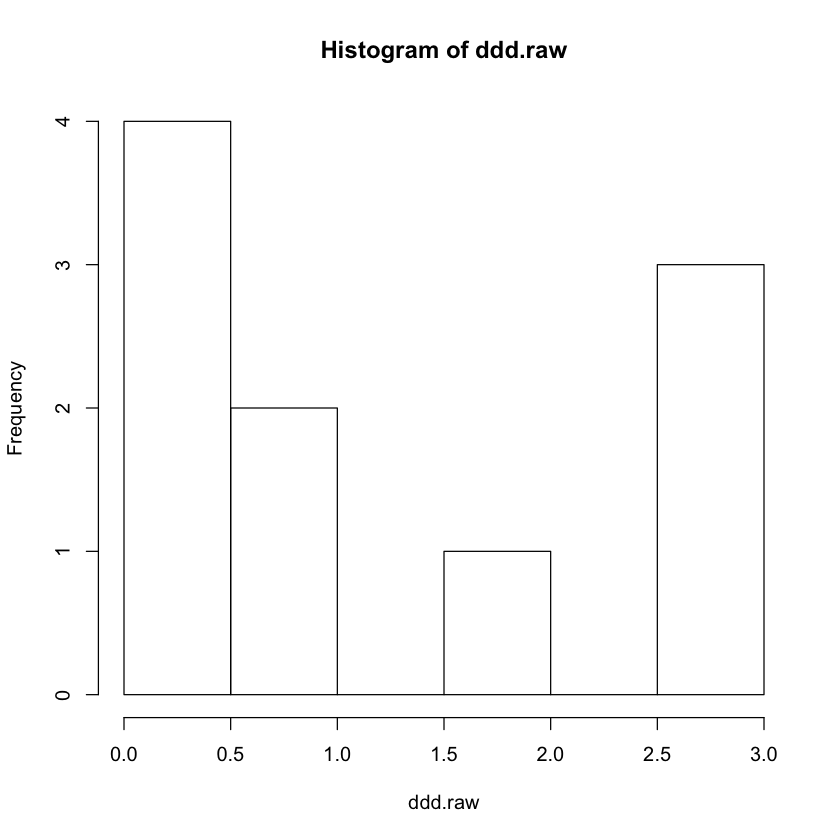

In [55]:
ddd.raw <- unlist(mapply(rep, ddd$Age, ddd$Freqency)); ddd.raw
hist(ddd.raw)